<a href="https://colab.research.google.com/github/anand1994sp/Machine-Learning-Main-Projects/blob/NLP-Disease-Classification-using-Drug-Review/NLP_Disease_Identifier_using_Reviews%20LSTM%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classiffication of the condition of patients using the reviews on drugs given by patients at different website sources.

Data Source(Citation) - https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29


**Attribute Information:**

*1. drugName (categorical): name of drug*

*2. condition (categorical): name of condition*

*3. review (text): patient review*

*4. rating (numerical): 10 star patient rating*

*5. date (date): date of review entry*

*6. usefulCount (numerical): number of users who found review useful*

In [150]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows',None)

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
df=pd.read_csv("/content/drive/MyDrive/DS/DATASETS/Drug Review/drugsComTrain_raw.tsv",sep="\t")

In [153]:
df.head(2)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192


In [154]:
df1=pd.read_csv("/content/drive/MyDrive/DS/DATASETS/Drug Review/drugsComTest_raw.tsv",sep="\t")

In [155]:
df1.head(2)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.""",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done very well on the Asacol. He has no complaints and shows no side effects. He has taken as many as nine tablets per day at one time. I&#039;ve been very happy with the results, reducing his bouts of diarrhea drastically.""",8.0,"May 17, 2009",17


In [156]:
df2=pd.concat([df,df1],axis=0)

In [157]:
df2.head(2)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192


In [158]:
df2.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [159]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [160]:
df2.head(2)

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192


In [161]:
df2.condition.value_counts()[:15]

Birth Control                38436
Depression                   12164
Pain                         8245 
Anxiety                      7812 
Acne                         7435 
Bipolar Disorde              5604 
Insomnia                     4904 
Weight Loss                  4857 
Obesity                      4757 
ADHD                         4509 
Diabetes, Type 2             3362 
Emergency Contraception      3290 
High Blood Pressure          3104 
Vaginal Yeast Infection      3085 
Abnormal Uterine Bleeding    2744 
Name: condition, dtype: int64

In [162]:
df2.condition.value_counts()[:15].index

Index(['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne',
       'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD',
       'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure',
       'Vaginal Yeast Infection', 'Abnormal Uterine Bleeding'],
      dtype='object')

In [163]:
df3=df2[df2['condition'].isin(df2.condition.value_counts()[:15].index)]

In [164]:
df3.head(2)

,drugName,condition,review,rating,date,usefulCount
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5.0,"December 14, 2009",17


In [165]:
df3.shape

(114308, 6)

In [166]:
df3[df3["usefulCount"]>=10].shape

(66613, 6)

In [167]:
df4=df3[df3["usefulCount"]>=10]

In [168]:
df4.condition.value_counts()

Depression                   10691
Birth Control                8889 
Anxiety                      6836 
Pain                         6685 
Bipolar Disorde              4847 
Insomnia                     4086 
Acne                         3980 
Obesity                      3943 
Weight Loss                  3942 
ADHD                         3828 
High Blood Pressure          2750 
Diabetes, Type 2             2706 
Emergency Contraception      1486 
Abnormal Uterine Bleeding    1139 
Vaginal Yeast Infection      805  
Name: condition, dtype: int64

In [169]:
df4.drop(df4[df4["condition"]=="Vaginal Yeast Infection"].index,axis=0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [206]:
df4.drop(df4[df4["condition"]=="Abnormal Uterine Bleeding"].index,axis=0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [207]:
df5=df4.loc[:,["review","condition"]]

In [208]:
df5.head(2)

,review,condition
1,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",ADHD
2,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",Birth Control


In [209]:
df5.condition.unique()

array(['ADHD', 'Birth Control', 'Bipolar Disorde', 'Depression',
       'Obesity', 'Insomnia', 'Pain', 'Diabetes, Type 2', 'Anxiety',
       'Acne', 'Emergency Contraception', 'High Blood Pressure',
       'Weight Loss'], dtype=object)

In [210]:
# segregating dataframe for analyzing individual condition
X={}
for i in df5.condition.unique():
  X[i]=df5[df["condition"]==i]

Depression=X["Depression"]
Birth_Control=X["Birth Control"]
Anxiety=X["Anxiety"]
Pain=X["Pain"]
# ADHD=X["ADHD"]
# Bipolar_Disorde=X["Bipolar Disorde"]
# Obesity=X["Obesity"]
# Insomnia=X["Insomnia"]
# Diabetes_Type_2=X["Diabetes, Type 2"]
# Acne=X["Acne"]
# Emergency_Contraception=X["Emergency Contraception"]
# High_Blood_Pressure=X["High Blood Pressure"]
# Abnormal_Uterine_Bleeding=X["Abnormal Uterine Bleeding"]
# Weight_Loss=X["Weight Loss"]
# Vaginal_Yeast_Infection=X["Vaginal Yeast Infection"]


<ipython-input-210-101e5dc1c806>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X[i]=df5[df["condition"]==i]


In [211]:
Depression.head()

,review,condition
11,"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.""",Depression
67,"""This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recommend this for severe depression. I would also like to mention for people to realize there is light at the end of the tunnel and YOU WILL GET BETTER, and to never give up.""",Depression
81,"""Started taking it and I slept well at night and awoke early around 5 to start my day happily. But come 8 am and I am drowsy and needed to take already two hrs nap. Awake and resume\r\r\nMy day with not much difficulties. Than st 2 pm again I needed a nap? So how was I gonna make it to work and my appointments too ? I went cold turkey. Felt much better after that. Only to crash again. I did try other anti depressants including pristique. But I suffered with insomnia with these meds. I know I need to start again but so confused if I should resume welbutrin""",Depression
96,"""Intake Effexor XR 375 mg, and lorazepam for depression and anxiety. My doctor added Abilify and I took it in mornings. It made me foggy. I moved it to Bertie and sleep better overall. I have noticed an increase in irritability which equates to feeling extremely angry by 3 pm daily. I&#039;ve rearranged my lorazepam to reduce that but need more time. I&#039;m also having restlessness which almost feels manic. We shall see. Increased cravings for sweets.""",Depression
143,"""This medication is amazing! After 3 days of being extremely sick, I started to feel amazing, I am now 1 month into it and am so happy all the time and have no depressive thoughts at all. It kind of blocks out any sad thoughts. Works perfectly for me.""",Depression


Text(0.5, 1.0, 'Word cloud for Depression')

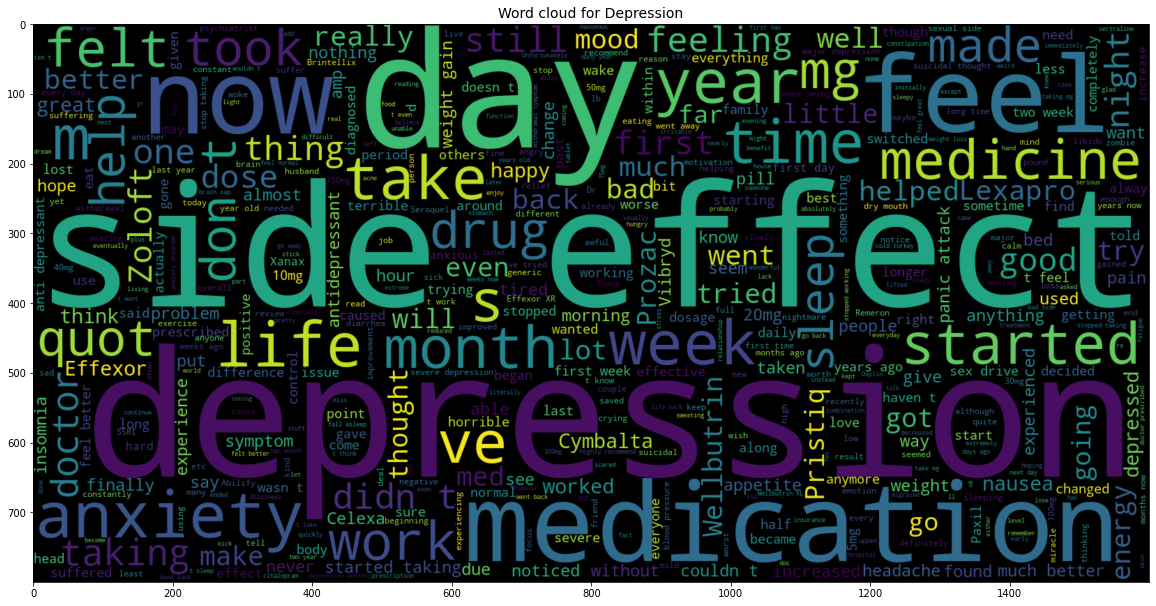

In [212]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(Depression.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Birth_Control')

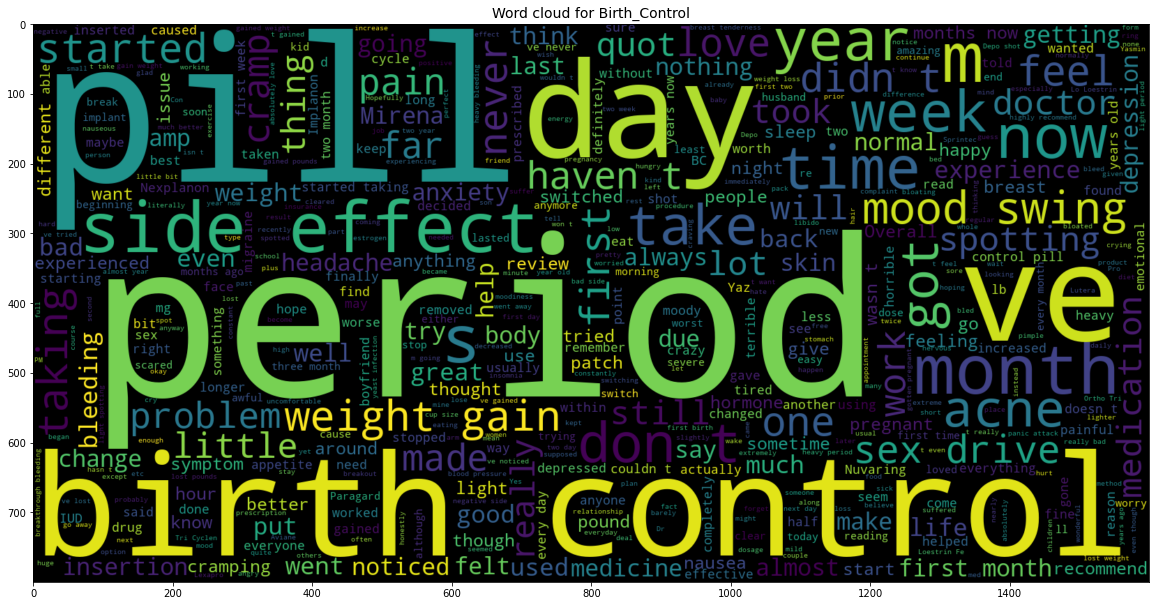

In [213]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(Birth_Control.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth_Control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Anxiety')

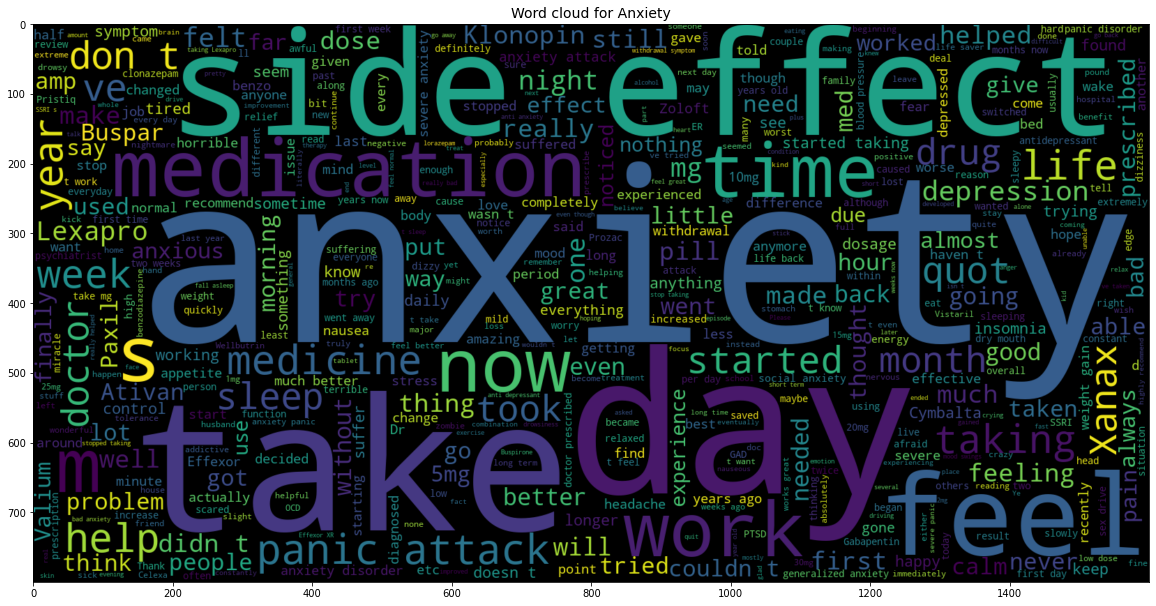

In [214]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(Anxiety.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Anxiety',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Pain')

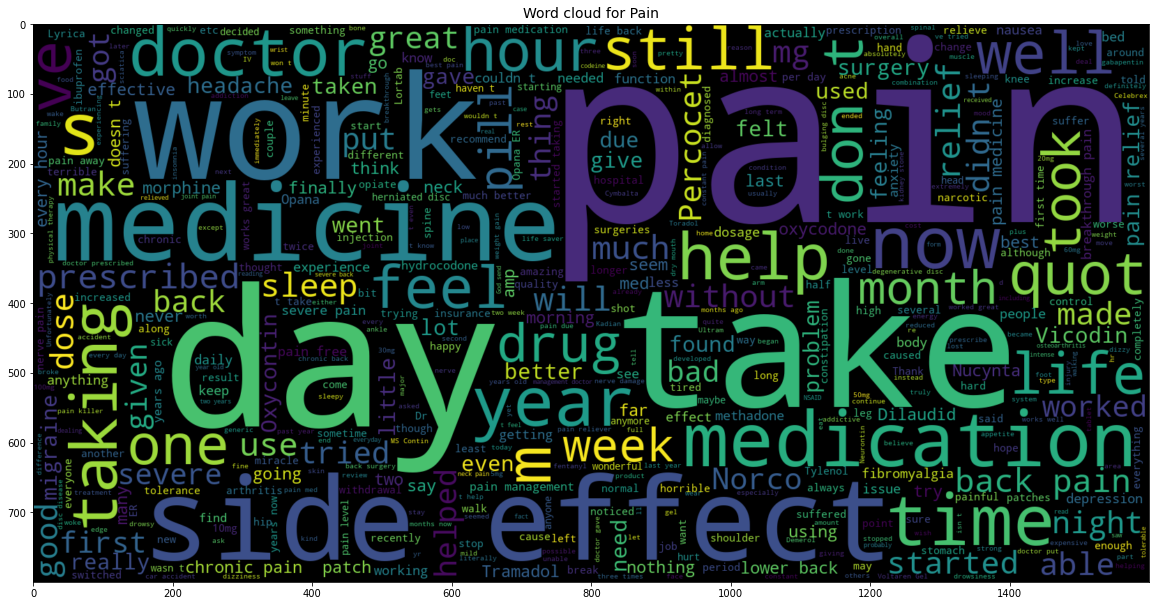

In [215]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(Pain.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Pain',fontsize=14)

**Data Preprocessing**

In [216]:
df5['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [217]:
df5['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [218]:
for i, col in enumerate(df5.columns):
    df5.iloc[:, i] = df5.iloc[:, i].str.replace('"', '')

In [219]:
df5['review'][11]

'I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.'

In [220]:
df5.head(2)

,review,condition
1,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.",ADHD
2,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.",Birth Control


**Stopwords** might not add much value to the meaning of the document.

The most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

In [221]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [222]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

**Lemmitization**
use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [223]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [224]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [225]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [226]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [227]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [228]:
from bs4 import BeautifulSoup
import re

In [229]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [230]:
df5['review_clean'] = df5['review'].apply(review_to_words)

# Creating features and Target Variable

In [231]:
X=df5['review_clean']
y,levels = pd.factorize(df5['condition'])

In [232]:
converter = lambda x: x.replace(' ', '_')
levels = list(map(converter, levels))
levels

['ADHD',
 'Birth_Control',
 'Bipolar_Disorde',
 'Depression',
 'Obesity',
 'Insomnia',
 'Pain',
 'Diabetes,_Type_2',
 'Anxiety',
 'Acne',
 'Emergency_Contraception',
 'High_Blood_Pressure',
 'Weight_Loss']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2, random_state=0)

In [234]:
X_train.shape

(51517,)

In [235]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [236]:
count_train

<51517x21348 sparse matrix of type '<class 'numpy.int64'>'
	with 1568685 stored elements in Compressed Sparse Row format>

# Machine Learning Model : Naive Bayes

In [237]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)



accuracy:   0.833


In [238]:
from sklearn.metrics import confusion_matrix

In [239]:
cm=confusion_matrix(y_test,pred)

In [240]:
import seaborn as sns

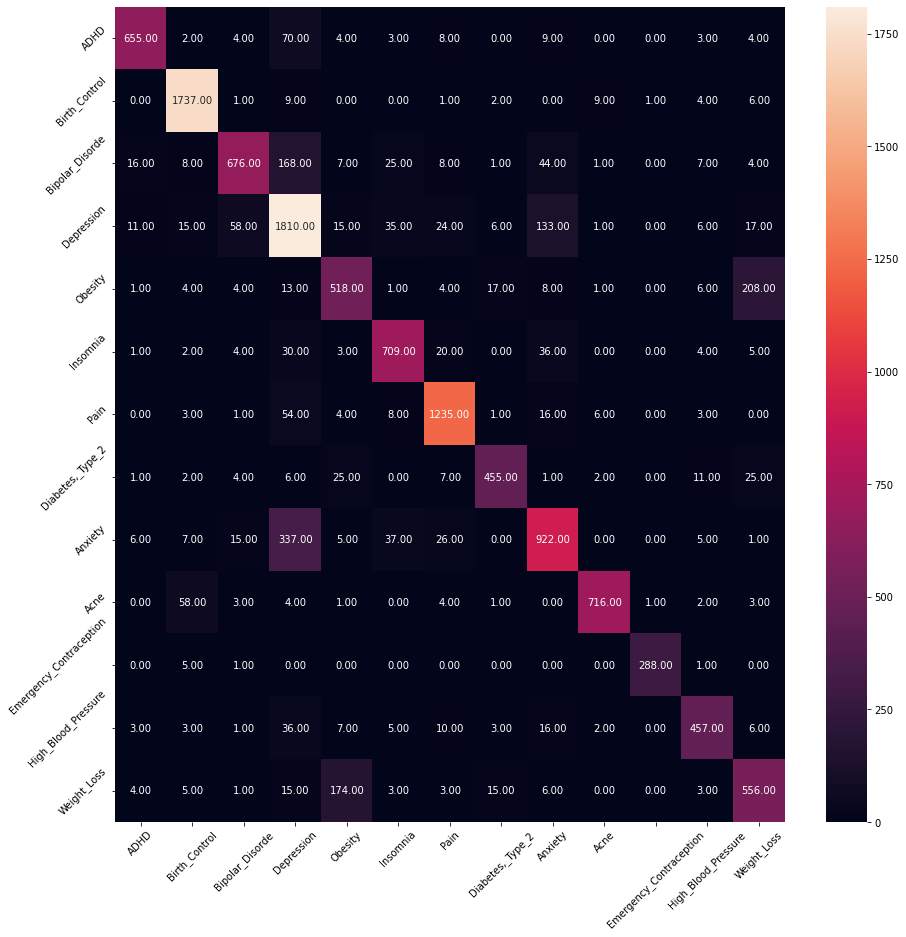

In [241]:
fig,ax=plt.subplots(figsize=(15,15))

sns.heatmap(cm,annot=True,fmt=".2f")
ax.set_xticklabels(levels,rotation=45)
ax.set_yticklabels(levels,rotation=45);

# Machine Learning Model : Passive Aggressive Classifier

In [242]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.874


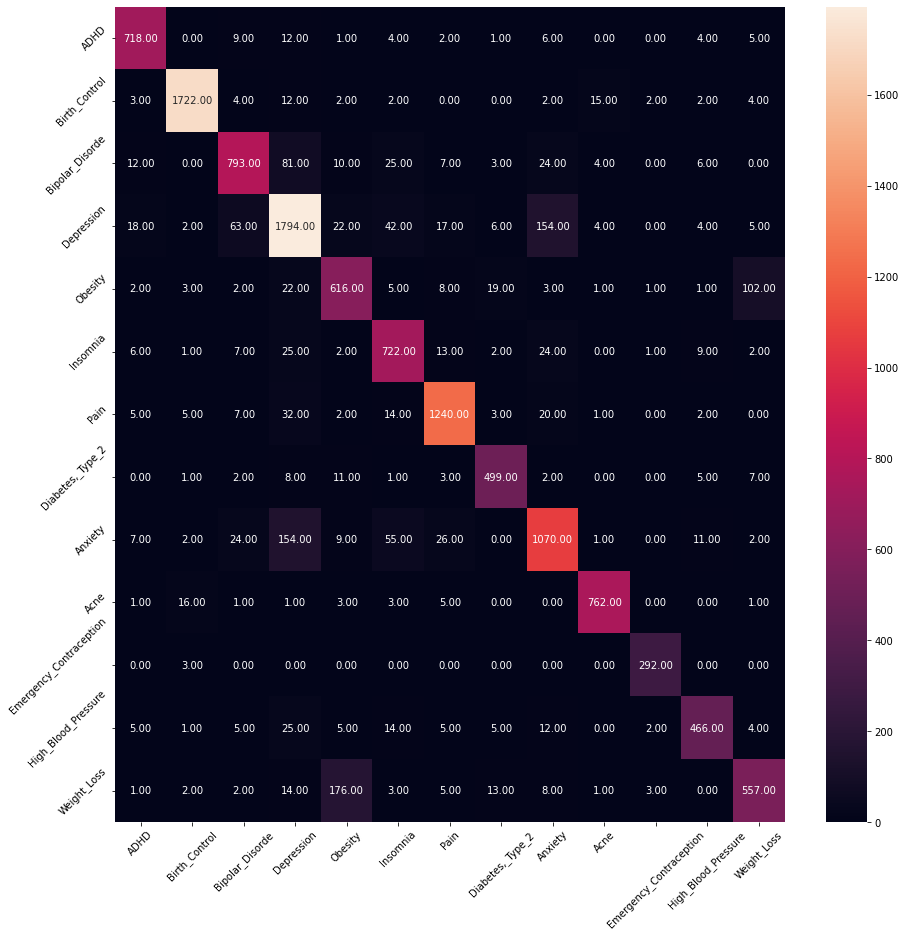

In [243]:
cm=confusion_matrix(y_test,pred)
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt=".2f")
ax.set_xticklabels(levels,rotation=45)
ax.set_yticklabels(levels,rotation=45);

# TFIDF

In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# Machine Learning Model : Naive Bayes

In [246]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.896


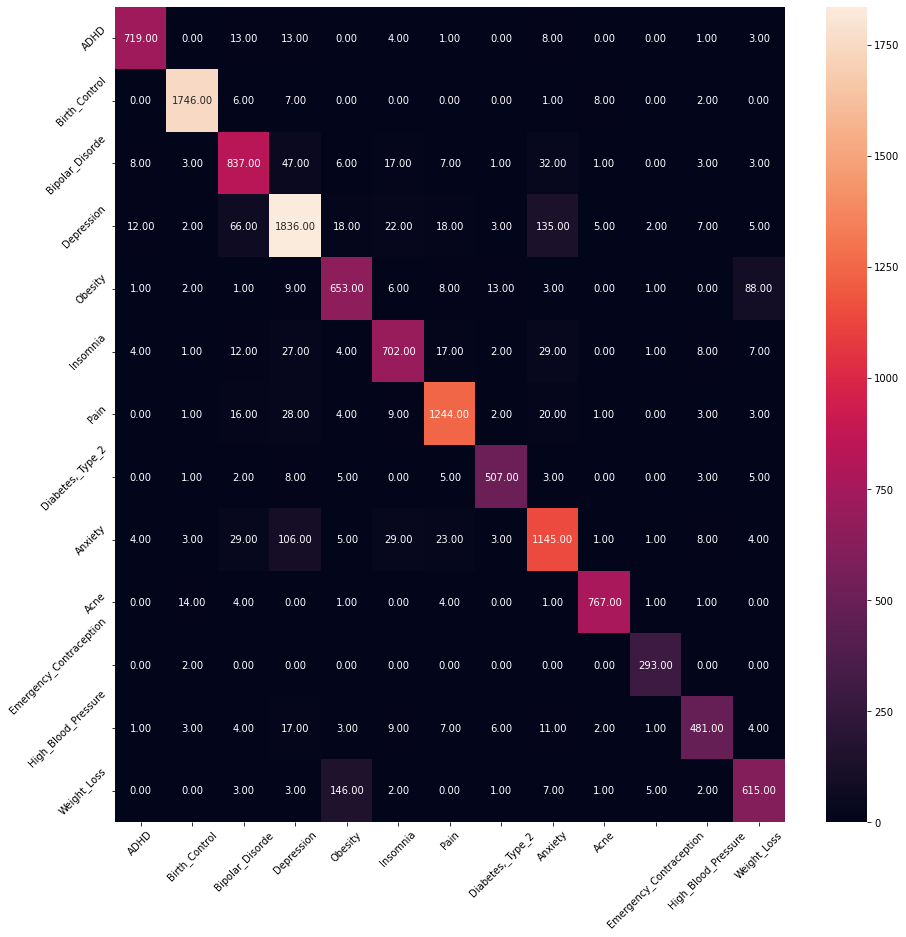

In [247]:
cm=confusion_matrix(y_test,pred)
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt=".2f")
ax.set_xticklabels(levels,rotation=45)
ax.set_yticklabels(levels,rotation=45);

# TFIDF: Bigrams






In [248]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.935


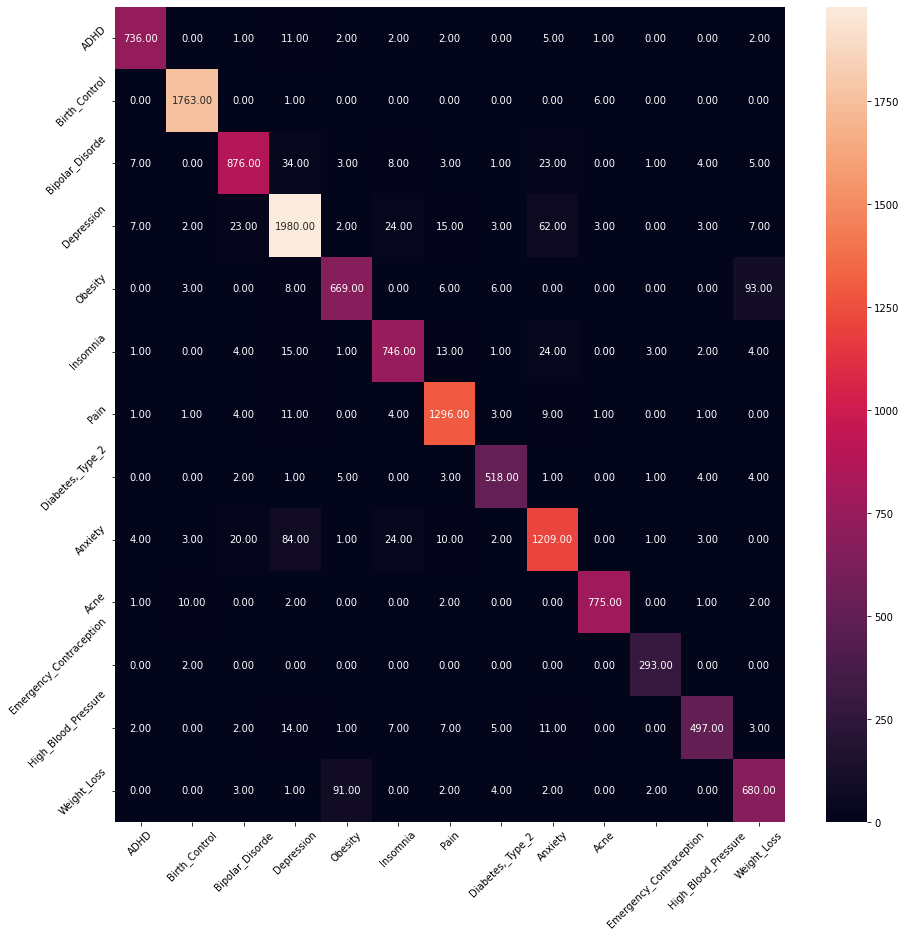

In [249]:
cm=confusion_matrix(y_test,pred)
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt=".2f")
ax.set_xticklabels(levels,rotation=45)
ax.set_yticklabels(levels,rotation=45);

# TFIDF : Trigrams

In [250]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.935


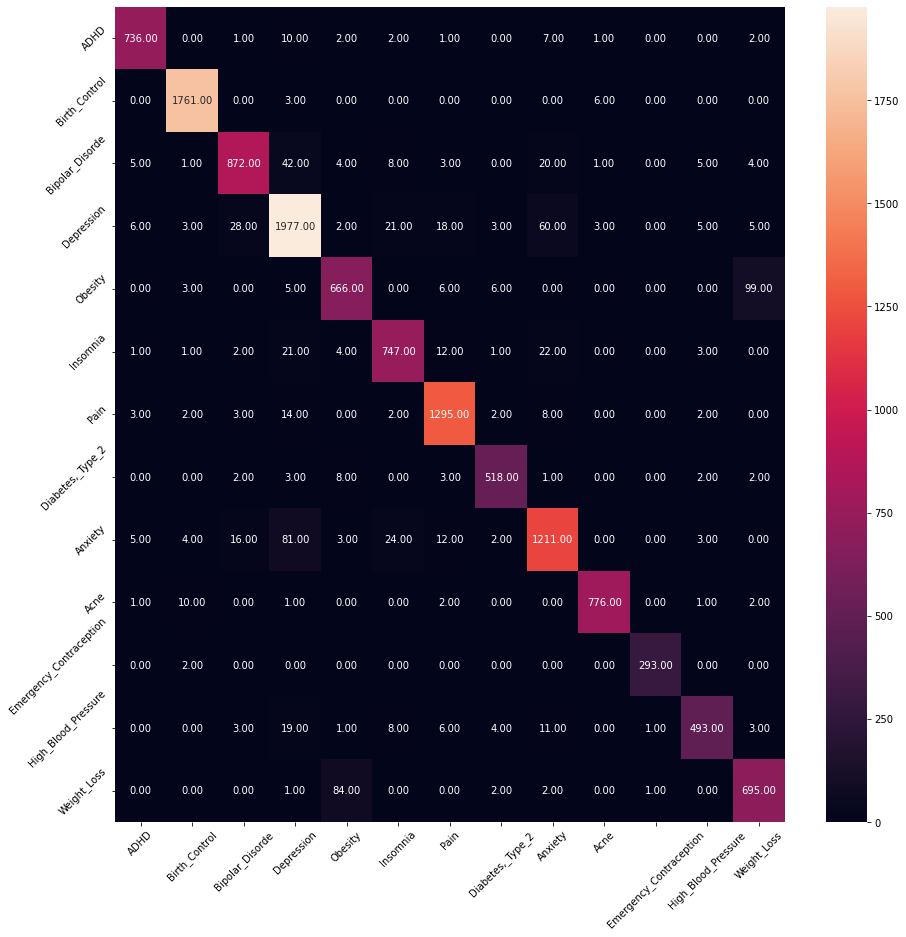

In [251]:
cm=confusion_matrix(y_test,pred)
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cm,annot=True,fmt=".2f")
ax.set_xticklabels(levels,rotation=45)
ax.set_yticklabels(levels,rotation=45);

In [263]:
X.tail()

53756    treatment adhd save life believe hype stigma around diagnosis treatment real condition real treatment make real profound difference life people debilitating condition afraid seek help think might adhd childhood illness opinion generally consists persists form duration life like disease                                                                                                                                                                                       
53759    microgestin year past year started get extremely bad headache sugar pill week took extra strength tylenol entire week twice day still make headache go away also would feel lightheaded nauseous leave work early bad good thing box tampon entire year barely period oh yeah also got high pigmentation right lip call pregnancy mask get certain birth control dark difficult hide makeup big fan weird skin mustache went                                                         
53760    started taking apri month ago bre

In [274]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [275]:
X_train=pd.DataFrame(X_train,columns=X.columns)
y_train=pd.DataFrame(y_train,columns=y.columns)

In [268]:
X_test=pd.DataFrame(X_test,columns=X.columns)

In [272]:
X.tail(2)

,review_clean
53762,taking lexapro escitaploprgram since february first like mention take drug week le expect magically feel better felt really sick first two week drug give drug time really start noticing drug positive effect two month took zoloft felt like made tired absent minded luckily lexapro seem effect although drink caffeinated drink like lexapro anxiety depression completely gone feel like finally handle everything life working full time college student highly recommend drug
53764,prescribed nucynta severe neck shoulder pain taking mg pill rushed er severe breathing problem never issue pain medicine


In [276]:
y.tail(2)

,0
64395,8
64396,6


In [271]:
text =["taking lexapro escitaploprgram since february first like mention take drug week le expect magically feel better felt really sick first two week drug give drug time really start noticing drug positive effect two month took zoloft felt like made tired absent minded luckily lexapro seem effect although drink caffeinated drink like lexapro anxiety depression completely gone feel like finally handle everything life working full time college student highly recommend drug"]
test = tfidf_vectorizer3.transform(text)
pred1=pass_tf.predict(test)
pred1

array([8])